In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mat
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv(r'loan_level_500k.csv')

In [3]:
data.shape

(500137, 27)

In [4]:
data

,CREDIT_SCORE,FIRST_PAYMENT_DATE,FIRST_TIME_HOMEBUYER_FLAG,MATURITY_DATE,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,OCCUPANCY_STATUS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,...,PROPERTY_TYPE,POSTAL_CODE,LOAN_SEQUENCE_NUMBER,LOAN_PURPOSE,ORIGINAL_LOAN_TERM,NUMBER_OF_BORROWERS,SELLER_NAME,SERVICER_NAME,PREPAID,DELINQUENT
0,669.0,200206,N,202901,NaN,0.0,1.0,O,80.0,33.0,...,SF,26100.0,F199Q1000004,P,320,2.0,Other sellers,Other servicers,True,False
1,732.0,199904,N,202903,17140.0,0.0,1.0,O,25.0,10.0,...,SF,45200.0,F199Q1000005,N,360,1.0,Other sellers,Other servicers,True,False
2,679.0,200208,N,202902,15940.0,30.0,1.0,O,91.0,48.0,...,SF,44700.0,F199Q1000007,P,319,1.0,Other sellers,Other servicers,True,False
3,721.0,200209,N,202902,38060.0,0.0,1.0,O,39.0,13.0,...,SF,85200.0,F199Q1000013,N,318,2.0,Other sellers,Other servicers,True,False
4,618.0,200210,N,202902,10420.0,25.0,1.0,O,85.0,24.0,...,SF,44200.0,F199Q1000015,N,317,2.0,Other sellers,Other servicers,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500132,774.0,200203,NaN,203202,33460.0,0.0,1.0,O,61.0,38.0,...,SF,55400.0,F102Q1125986,C,360,1.0,WELLSFARGOHOMEMORTGA,"WELLSFARGOBANK,NA",True,False
500133,689.0,200203,NaN,203202,10580.0,0.0,1.0,O,70.0,39.0,...,SF,12300.0,F102Q1125989,N,360,1.0,WELLSFARGOHOMEMORTGA,WELLSFARGOHOMEMORTGA,True,False
500134,798.0,200203,NaN,203202,19780.0,0.0,1.0,O,56.0,41.0,...,SF,50300.0,F102Q1125990,C,360,1.0,WELLSFARGOHOMEMORTGA,"WELLSFARGOBANK,NA",True,False
500135,791.0,200203,NaN,203202,42044.0,0.0,1.0,O,26.0,18.0,...,SF,92600.0,F102Q1125991,N,360,1.0,WELLSFARGOHOMEMORTGA,"WELLSFARGOBANK,NA",True,False


In [5]:
data.head()

,CREDIT_SCORE,FIRST_PAYMENT_DATE,FIRST_TIME_HOMEBUYER_FLAG,MATURITY_DATE,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,OCCUPANCY_STATUS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,...,PROPERTY_TYPE,POSTAL_CODE,LOAN_SEQUENCE_NUMBER,LOAN_PURPOSE,ORIGINAL_LOAN_TERM,NUMBER_OF_BORROWERS,SELLER_NAME,SERVICER_NAME,PREPAID,DELINQUENT
0,669.0,200206,N,202901,NaN,0.0,1.0,O,80.0,33.0,...,SF,26100.0,F199Q1000004,P,320,2.0,Other sellers,Other servicers,True,False
1,732.0,199904,N,202903,17140.0,0.0,1.0,O,25.0,10.0,...,SF,45200.0,F199Q1000005,N,360,1.0,Other sellers,Other servicers,True,False
2,679.0,200208,N,202902,15940.0,30.0,1.0,O,91.0,48.0,...,SF,44700.0,F199Q1000007,P,319,1.0,Other sellers,Other servicers,True,False
3,721.0,200209,N,202902,38060.0,0.0,1.0,O,39.0,13.0,...,SF,85200.0,F199Q1000013,N,318,2.0,Other sellers,Other servicers,True,False
4,618.0,200210,N,202902,10420.0,25.0,1.0,O,85.0,24.0,...,SF,44200.0,F199Q1000015,N,317,2.0,Other sellers,Other servicers,True,False


In [6]:
data.describe()

,CREDIT_SCORE,FIRST_PAYMENT_DATE,MATURITY_DATE,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,POSTAL_CODE,ORIGINAL_LOAN_TERM,NUMBER_OF_BORROWERS
count,497426.000000,500137.000000,500137.000000,429988.000000,449089.000000,500134.000000,500124.000000,485208.000000,500137.000000,500128.000000,500137.000000,500106.000000,500137.000000,499890.000000
mean,712.536212,200025.430952,203023.195872,30777.824739,7.744532,1.028890,76.053571,32.917541,136493.484785,75.710714,7.182687,55490.857138,359.855470,1.630295
std,54.791262,109.815541,110.384189,11333.401144,12.046546,0.218391,15.139986,11.111800,60968.743066,14.937717,0.579941,29505.382259,1.908251,0.482725
min,300.000000,199901.000000,202402.000000,10180.000000,0.000000,1.000000,6.000000,1.000000,8000.000000,6.000000,4.625000,600.000000,301.000000,1.000000
25%,676.000000,199904.000000,202903.000000,19740.000000,0.000000,1.000000,70.000000,25.000000,89000.000000,70.000000,6.875000,30500.000000,360.000000,1.000000
50%,719.000000,200005.000000,203004.000000,33340.000000,0.000000,1.000000,80.000000,33.000000,126000.000000,80.000000,7.000000,54200.000000,360.000000,2.000000
75%,756.000000,200105.000000,203104.000000,40420.000000,18.000000,1.000000,88.000000,41.000000,176000.000000,85.000000,7.375000,85000.000000,360.000000,2.000000
max,839.000000,201103.000000,204101.000000,49740.000000,55.000000,4.000000,180.000000,65.000000,578000.000000,100.000000,11.500000,99900.000000,362.000000,2.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500137 entries, 0 to 500136
Data columns (total 27 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   CREDIT_SCORE                      497426 non-null  float64
 1   FIRST_PAYMENT_DATE                500137 non-null  int64  
 2   FIRST_TIME_HOMEBUYER_FLAG         369578 non-null  object 
 3   MATURITY_DATE                     500137 non-null  int64  
 4   METROPOLITAN_STATISTICAL_AREA     429988 non-null  float64
 5   MORTGAGE_INSURANCE_PERCENTAGE     449089 non-null  float64
 6   NUMBER_OF_UNITS                   500134 non-null  float64
 7   OCCUPANCY_STATUS                  500137 non-null  object 
 8   ORIGINAL_COMBINED_LOAN_TO_VALUE   500124 non-null  float64
 9   ORIGINAL_DEBT_TO_INCOME_RATIO     485208 non-null  float64
 10  ORIGINAL_UPB                      500137 non-null  int64  
 11  ORIGINAL_LOAN_TO_VALUE            500128 non-null  f

In [8]:
data.isnull().sum()

CREDIT_SCORE                          2711
FIRST_PAYMENT_DATE                       0
FIRST_TIME_HOMEBUYER_FLAG           130559
MATURITY_DATE                            0
METROPOLITAN_STATISTICAL_AREA        70149
MORTGAGE_INSURANCE_PERCENTAGE        51048
NUMBER_OF_UNITS                          3
OCCUPANCY_STATUS                         0
ORIGINAL_COMBINED_LOAN_TO_VALUE         13
ORIGINAL_DEBT_TO_INCOME_RATIO        14929
ORIGINAL_UPB                             0
ORIGINAL_LOAN_TO_VALUE                   9
ORIGINAL_INTEREST_RATE                   0
CHANNEL                                  0
PREPAYMENT_PENALTY_MORTGAGE_FLAG      5178
PRODUCT_TYPE                             0
PROPERTY_STATE                           0
PROPERTY_TYPE                           95
POSTAL_CODE                             31
LOAN_SEQUENCE_NUMBER                     0
LOAN_PURPOSE                             0
ORIGINAL_LOAN_TERM                       0
NUMBER_OF_BORROWERS                    247
SELLER_NAME

<AxesSubplot: xlabel='DELINQUENT', ylabel='count'>

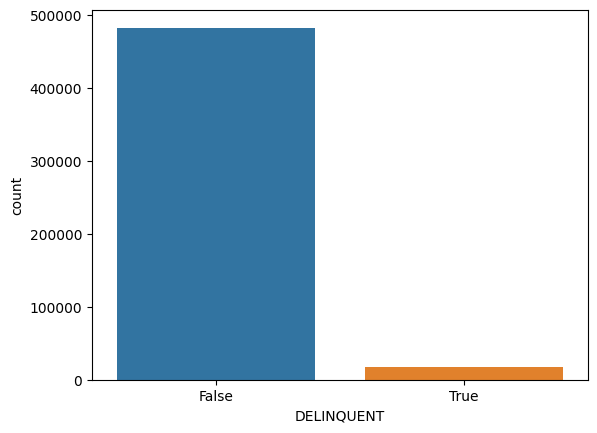

In [9]:
sns.countplot(x='DELINQUENT',data=data)

In [10]:
categorical = data.select_dtypes(include=['object','bool'])

In [11]:
categorical.drop('LOAN_SEQUENCE_NUMBER',inplace = True,axis=1)

In [12]:
numerical = data.select_dtypes(include=['int64','float64'])

In [13]:
numerical

,CREDIT_SCORE,FIRST_PAYMENT_DATE,MATURITY_DATE,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,POSTAL_CODE,ORIGINAL_LOAN_TERM,NUMBER_OF_BORROWERS
0,669.0,200206,202901,NaN,0.0,1.0,80.0,33.0,162000,80.0,7.120,26100.0,320,2.0
1,732.0,199904,202903,17140.0,0.0,1.0,25.0,10.0,53000,25.0,6.500,45200.0,360,1.0
2,679.0,200208,202902,15940.0,30.0,1.0,91.0,48.0,133000,91.0,6.750,44700.0,319,1.0
3,721.0,200209,202902,38060.0,0.0,1.0,39.0,13.0,174000,39.0,6.625,85200.0,318,2.0
4,618.0,200210,202902,10420.0,25.0,1.0,85.0,24.0,122000,85.0,6.375,44200.0,317,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500132,774.0,200203,203202,33460.0,0.0,1.0,61.0,38.0,76000,61.0,6.625,55400.0,360,1.0
500133,689.0,200203,203202,10580.0,0.0,1.0,70.0,39.0,70000,70.0,6.625,12300.0,360,1.0
500134,798.0,200203,203202,19780.0,0.0,1.0,56.0,41.0,65000,56.0,6.625,50300.0,360,1.0
500135,791.0,200203,203202,42044.0,0.0,1.0,26.0,18.0,51000,26.0,6.625,92600.0,360,1.0


In [14]:
data['DELINQUENT'].value_counts()

False    482146
True      17991
Name: DELINQUENT, dtype: int64

In [15]:
correlation = data.corr()

<function matplotlib.pyplot.show(close=None, block=None)>

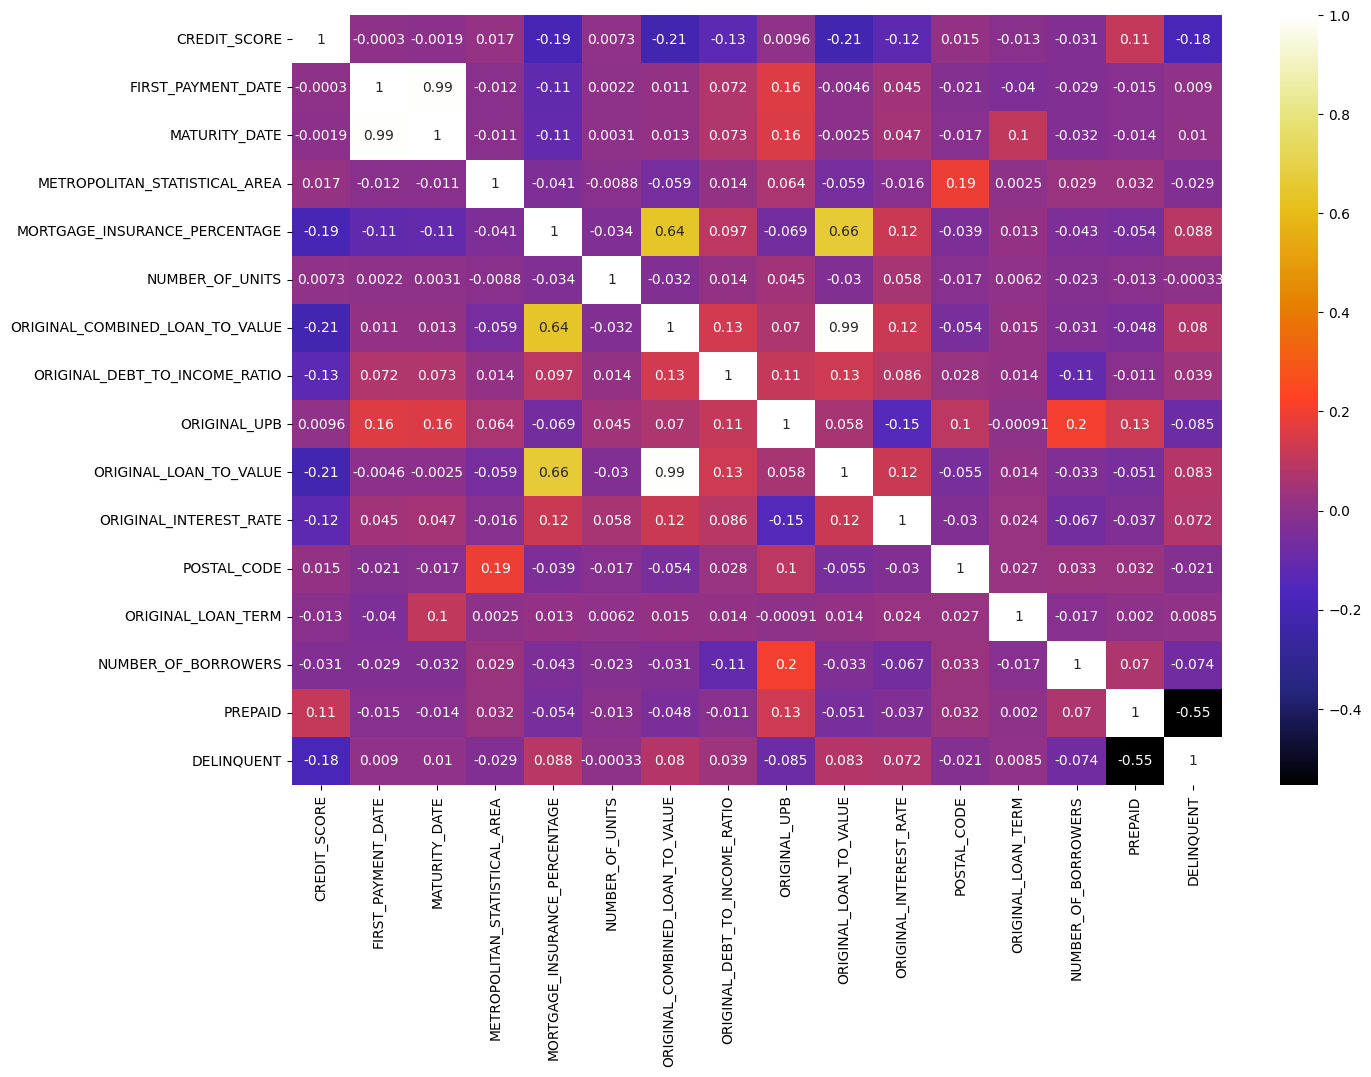

In [16]:
mat.figure(figsize=(15,10))
sns.heatmap(correlation,cmap="CMRmap",annot=True)
mat.show

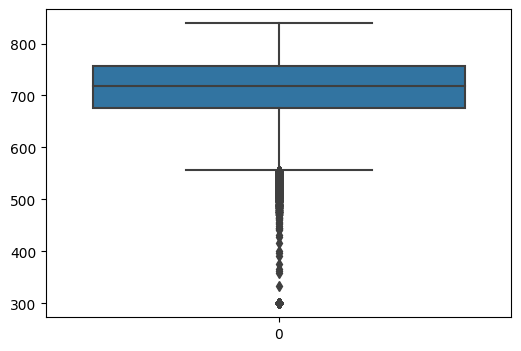

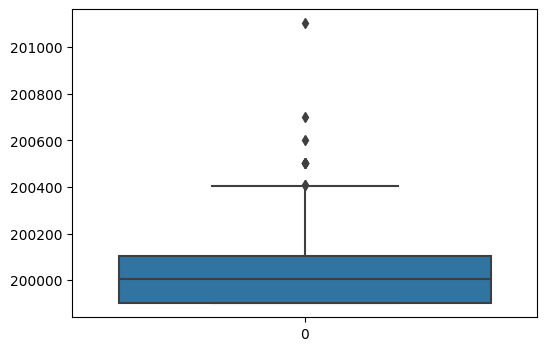

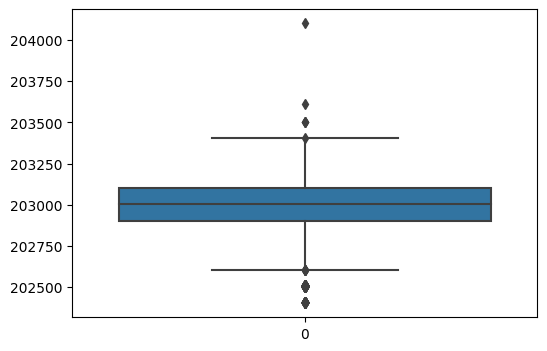

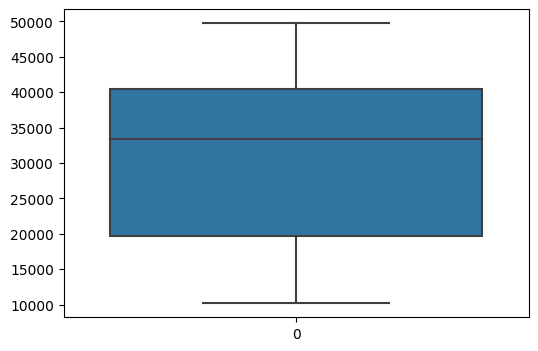

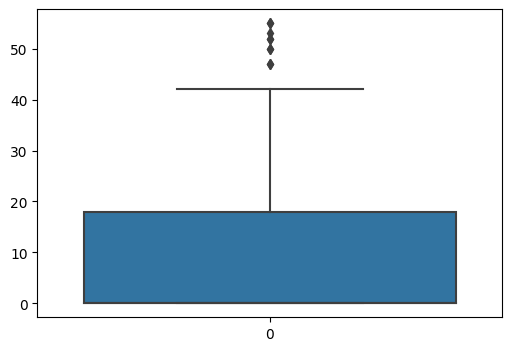

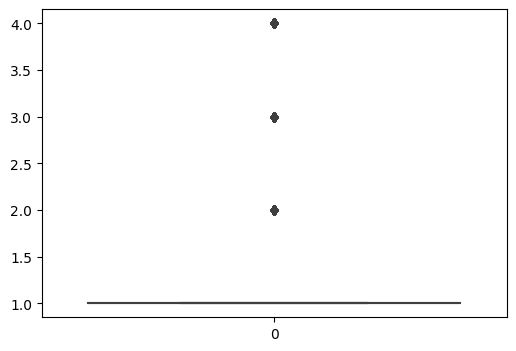

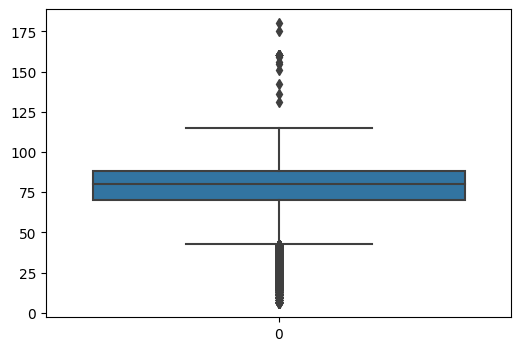

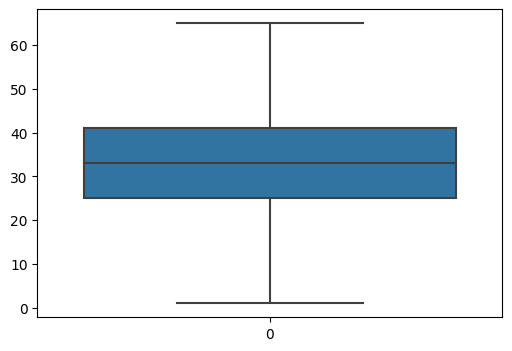

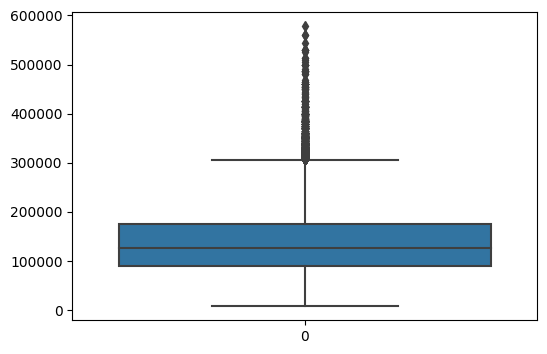

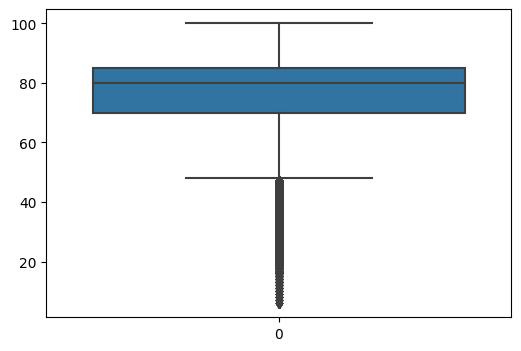

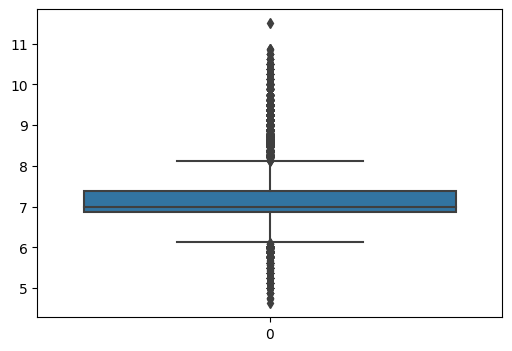

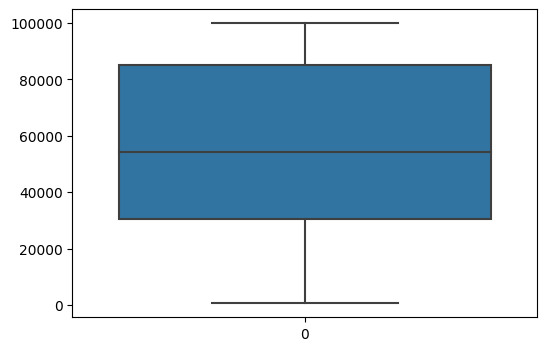

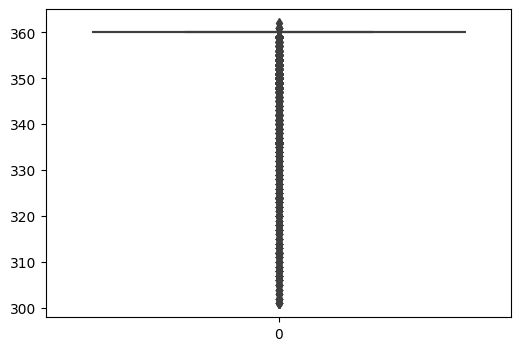

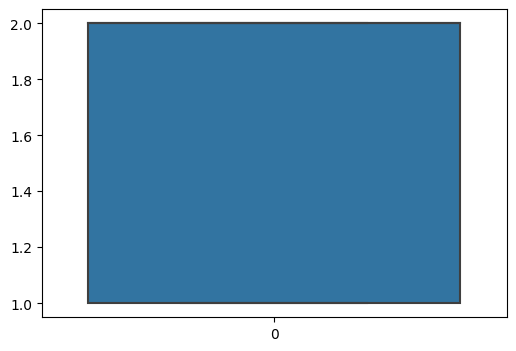

In [17]:
for i in numerical:
    mat.figure(figsize=(6,4))
    sns.boxplot(data[i])
    mat.show()

In [18]:
for i in numerical:
    numerical[i] = numerical[i].fillna(numerical[i].median())

In [19]:
numerical.isnull().sum()

CREDIT_SCORE                       0
FIRST_PAYMENT_DATE                 0
MATURITY_DATE                      0
METROPOLITAN_STATISTICAL_AREA      0
MORTGAGE_INSURANCE_PERCENTAGE      0
NUMBER_OF_UNITS                    0
ORIGINAL_COMBINED_LOAN_TO_VALUE    0
ORIGINAL_DEBT_TO_INCOME_RATIO      0
ORIGINAL_UPB                       0
ORIGINAL_LOAN_TO_VALUE             0
ORIGINAL_INTEREST_RATE             0
POSTAL_CODE                        0
ORIGINAL_LOAN_TERM                 0
NUMBER_OF_BORROWERS                0
dtype: int64

In [20]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500137 entries, 0 to 500136
Data columns (total 14 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   CREDIT_SCORE                     500137 non-null  float64
 1   FIRST_PAYMENT_DATE               500137 non-null  int64  
 2   MATURITY_DATE                    500137 non-null  int64  
 3   METROPOLITAN_STATISTICAL_AREA    500137 non-null  float64
 4   MORTGAGE_INSURANCE_PERCENTAGE    500137 non-null  float64
 5   NUMBER_OF_UNITS                  500137 non-null  float64
 6   ORIGINAL_COMBINED_LOAN_TO_VALUE  500137 non-null  float64
 7   ORIGINAL_DEBT_TO_INCOME_RATIO    500137 non-null  float64
 8   ORIGINAL_UPB                     500137 non-null  int64  
 9   ORIGINAL_LOAN_TO_VALUE           500137 non-null  float64
 10  ORIGINAL_INTEREST_RATE           500137 non-null  float64
 11  POSTAL_CODE                      500137 non-null  float64
 12  OR

In [21]:
for i in categorical:
    categorical[i] = categorical[i].fillna(categorical[i].mode()[0])

In [22]:
categorical.isnull().sum()

FIRST_TIME_HOMEBUYER_FLAG           0
OCCUPANCY_STATUS                    0
CHANNEL                             0
PREPAYMENT_PENALTY_MORTGAGE_FLAG    0
PRODUCT_TYPE                        0
PROPERTY_STATE                      0
PROPERTY_TYPE                       0
LOAN_PURPOSE                        0
SELLER_NAME                         0
SERVICER_NAME                       0
PREPAID                             0
DELINQUENT                          0
dtype: int64

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in categorical:
    categorical[i]=le.fit_transform(categorical[i])

In [24]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500137 entries, 0 to 500136
Data columns (total 12 columns):
 #   Column                            Non-Null Count   Dtype
---  ------                            --------------   -----
 0   FIRST_TIME_HOMEBUYER_FLAG         500137 non-null  int32
 1   OCCUPANCY_STATUS                  500137 non-null  int32
 2   CHANNEL                           500137 non-null  int32
 3   PREPAYMENT_PENALTY_MORTGAGE_FLAG  500137 non-null  int32
 4   PRODUCT_TYPE                      500137 non-null  int32
 5   PROPERTY_STATE                    500137 non-null  int32
 6   PROPERTY_TYPE                     500137 non-null  int32
 7   LOAN_PURPOSE                      500137 non-null  int32
 8   SELLER_NAME                       500137 non-null  int32
 9   SERVICER_NAME                     500137 non-null  int32
 10  PREPAID                           500137 non-null  int64
 11  DELINQUENT                        500137 non-null  int64
dtypes: int32(10), in

In [25]:
loannew = pd.concat([numerical,categorical],axis = 1)

In [26]:
loannew.isnull().sum()

CREDIT_SCORE                        0
FIRST_PAYMENT_DATE                  0
MATURITY_DATE                       0
METROPOLITAN_STATISTICAL_AREA       0
MORTGAGE_INSURANCE_PERCENTAGE       0
NUMBER_OF_UNITS                     0
ORIGINAL_COMBINED_LOAN_TO_VALUE     0
ORIGINAL_DEBT_TO_INCOME_RATIO       0
ORIGINAL_UPB                        0
ORIGINAL_LOAN_TO_VALUE              0
ORIGINAL_INTEREST_RATE              0
POSTAL_CODE                         0
ORIGINAL_LOAN_TERM                  0
NUMBER_OF_BORROWERS                 0
FIRST_TIME_HOMEBUYER_FLAG           0
OCCUPANCY_STATUS                    0
CHANNEL                             0
PREPAYMENT_PENALTY_MORTGAGE_FLAG    0
PRODUCT_TYPE                        0
PROPERTY_STATE                      0
PROPERTY_TYPE                       0
LOAN_PURPOSE                        0
SELLER_NAME                         0
SERVICER_NAME                       0
PREPAID                             0
DELINQUENT                          0
dtype: int64

In [27]:
loannew

,CREDIT_SCORE,FIRST_PAYMENT_DATE,MATURITY_DATE,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,...,CHANNEL,PREPAYMENT_PENALTY_MORTGAGE_FLAG,PRODUCT_TYPE,PROPERTY_STATE,PROPERTY_TYPE,LOAN_PURPOSE,SELLER_NAME,SERVICER_NAME,PREPAID,DELINQUENT
0,669.0,200206,202901,33340.0,0.0,1.0,80.0,33.0,162000,80.0,...,2,0,0,51,5,2,36,18,1,0
1,732.0,199904,202903,17140.0,0.0,1.0,25.0,10.0,53000,25.0,...,2,0,0,36,5,1,36,18,1,0
2,679.0,200208,202902,15940.0,30.0,1.0,91.0,48.0,133000,91.0,...,2,0,0,36,5,2,36,18,1,0
3,721.0,200209,202902,38060.0,0.0,1.0,39.0,13.0,174000,39.0,...,3,0,0,3,5,1,36,18,1,0
4,618.0,200210,202902,10420.0,25.0,1.0,85.0,24.0,122000,85.0,...,2,0,0,36,5,1,36,18,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500132,774.0,200203,203202,33460.0,0.0,1.0,61.0,38.0,76000,61.0,...,2,0,0,24,5,0,47,24,1,0
500133,689.0,200203,203202,10580.0,0.0,1.0,70.0,39.0,70000,70.0,...,2,0,0,35,5,1,47,25,1,0
500134,798.0,200203,203202,19780.0,0.0,1.0,56.0,41.0,65000,56.0,...,2,0,0,13,5,0,47,24,1,0
500135,791.0,200203,203202,42044.0,0.0,1.0,26.0,18.0,51000,26.0,...,2,0,0,4,5,1,47,24,1,0


In [28]:
x = loannew.iloc[:,:-1]
y = loannew.iloc[:,-1]

In [29]:
x

,CREDIT_SCORE,FIRST_PAYMENT_DATE,MATURITY_DATE,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,...,OCCUPANCY_STATUS,CHANNEL,PREPAYMENT_PENALTY_MORTGAGE_FLAG,PRODUCT_TYPE,PROPERTY_STATE,PROPERTY_TYPE,LOAN_PURPOSE,SELLER_NAME,SERVICER_NAME,PREPAID
0,669.0,200206,202901,33340.0,0.0,1.0,80.0,33.0,162000,80.0,...,1,2,0,0,51,5,2,36,18,1
1,732.0,199904,202903,17140.0,0.0,1.0,25.0,10.0,53000,25.0,...,1,2,0,0,36,5,1,36,18,1
2,679.0,200208,202902,15940.0,30.0,1.0,91.0,48.0,133000,91.0,...,1,2,0,0,36,5,2,36,18,1
3,721.0,200209,202902,38060.0,0.0,1.0,39.0,13.0,174000,39.0,...,1,3,0,0,3,5,1,36,18,1
4,618.0,200210,202902,10420.0,25.0,1.0,85.0,24.0,122000,85.0,...,1,2,0,0,36,5,1,36,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500132,774.0,200203,203202,33460.0,0.0,1.0,61.0,38.0,76000,61.0,...,1,2,0,0,24,5,0,47,24,1
500133,689.0,200203,203202,10580.0,0.0,1.0,70.0,39.0,70000,70.0,...,1,2,0,0,35,5,1,47,25,1
500134,798.0,200203,203202,19780.0,0.0,1.0,56.0,41.0,65000,56.0,...,1,2,0,0,13,5,0,47,24,1
500135,791.0,200203,203202,42044.0,0.0,1.0,26.0,18.0,51000,26.0,...,1,2,0,0,4,5,1,47,24,1


In [30]:
y

0         0
1         0
2         0
3         0
4         0
         ..
500132    0
500133    0
500134    0
500135    0
500136    0
Name: DELINQUENT, Length: 500137, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 1,test_size = 0.2)

In [33]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 1)
x_resampled,y_resampled = smote.fit_resample(x_train,y_train)

In [34]:
y_resampled.value_counts()

0    385761
1    385761
Name: DELINQUENT, dtype: int64

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
ssc = StandardScaler()

In [37]:
scaled_x_resampled = ssc.fit_transform(x_resampled)

In [38]:
x_test= ssc.transform(x_test)

In [39]:
from xgboost import XGBClassifier

In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [41]:
xgb = XGBClassifier()

In [42]:
xgb.fit(scaled_x_resampled, y_resampled)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [43]:
y_pred = xgb.predict(x_test)

In [54]:
type(y_pred)

numpy.ndarray

In [46]:
accuracy = accuracy_score(y_test,y_pred)

In [47]:
accuracy

0.9744071659935218

In [48]:
conf = confusion_matrix(y_test,y_pred)

In [49]:
conf

array([[95714,   671],
       [ 1889,  1754]], dtype=int64)

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     96385
           1       0.72      0.48      0.58      3643

    accuracy                           0.97    100028
   macro avg       0.85      0.74      0.78    100028
weighted avg       0.97      0.97      0.97    100028



In [51]:
!pip install lime


^C


In [52]:
import lime 
import lime.lime_tabular

ModuleNotFoundError: No module named 'lime'